# Membuat Model Sistem Rekomendasi (Content-Based Filtering) Menggunakan Dataset Dari [TMDB Movies Dataset](https://www.kaggle.com/datasets/ahsanaseer/top-rated-tmdb-movies-10k/data)

- **Nama:** Fahru Rahman
- **Email:** fhrurhmn@gmail.com
- **ID Dicoding:** mc009d5y0506

# Import Library Yang Dibutuhkan

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os
from collections import Counter
from wordcloud import WordCloud, STOPWORDS

# Data Loading

In [2]:
# upload dataset
file_path = '/content/top10K-TMDB-movies.csv'
if os.path.exists(file_path):
    print(f"File {file_path} ditemukan di session storage.")
    df = pd.read_csv(file_path)
else:
    print("File tidak ditemukan. Silakan unggah file top10K-TMDB-movies.csv")
    uploaded = files.upload()
    df = pd.read_csv('top10K-TMDB-movies.csv')

File tidak ditemukan. Silakan unggah file top10K-TMDB-movies.csv


Saving top10K-TMDB-movies.csv to top10K-TMDB-movies.csv


In [17]:
df.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,combined_features
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862,"Drama,Crime Framed in the 1940s for the double..."
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731,"Comedy,Drama,Romance Raj is a rich, carefree, ..."
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280,"Drama,Crime Spanning the years 1945 to 1955, a..."
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959,"Drama,History,War The true story of how busine..."
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811,"Drama,Crime In the continuing saga of the Corl..."


>menampilkan informasi dataset

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              10000 non-null  object 
 3   original_language  10000 non-null  object 
 4   overview           10000 non-null  object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
 9   combined_features  10000 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 781.4+ KB


> mengecek missing value pada setiap kolom

In [5]:
print("\nJumlah Nilai Kosong per Kolom:")
print(df.isnull().sum())


Jumlah Nilai Kosong per Kolom:
id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64


> mengecek data duplikat

In [6]:
print("\nJumlah Duplicated:")
print(df.duplicated().sum())


Jumlah Duplicated:
0


# EDA

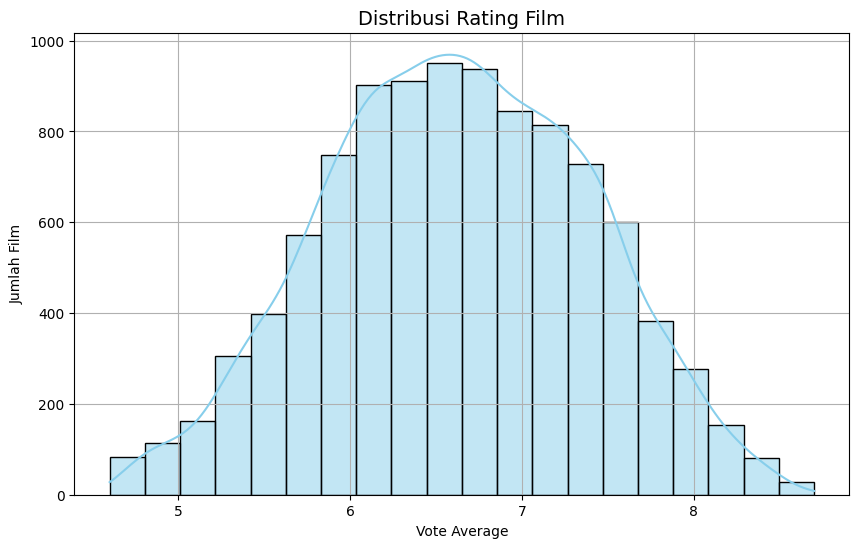

In [7]:
# Plot distribusi rating
plt.figure(figsize=(10, 6))
sns.histplot(df['vote_average'], bins=20, kde=True, color='skyblue')
plt.title('Distribusi Rating Film', fontsize=14)
plt.xlabel('Vote Average')
plt.ylabel('Jumlah Film')
plt.grid(True)
plt.show()

> Terlihat bahwa rata rata film memiliki rating 6.5 hingga 7.5 yang mencerminkan dataset berisi film film yang cukup bagus

<ipython-input-8-c134d8ea6f7b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_df.head(10), x='Jumlah', y='Genre', palette='viridis')


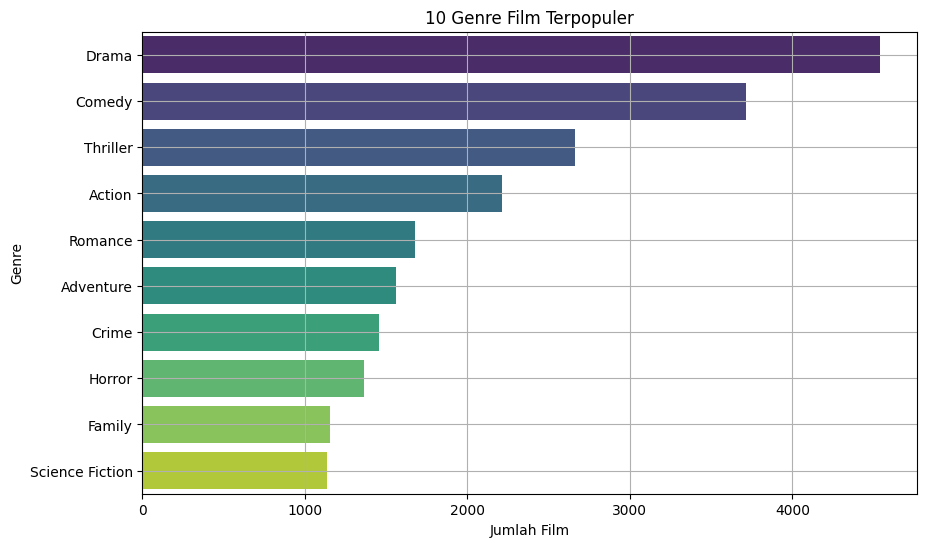

In [8]:
# Pisahkan genre
genre_split = df['genre'].dropna().apply(lambda x: x.split(','))
genre_counts = Counter([g.strip() for sublist in genre_split for g in sublist])
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Jumlah']).sort_values(by='Jumlah', ascending=False)

# Plot 10 genre terpopuler
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_df.head(10), x='Jumlah', y='Genre', palette='viridis')
plt.title('10 Genre Film Terpopuler')
plt.xlabel('Jumlah Film')
plt.ylabel('Genre')
plt.grid(True)
plt.show()

> terlihat dari grafik tersebut bahwa genre film yang terpopuler adalah drama, diikuti oleh comedy dan thriller

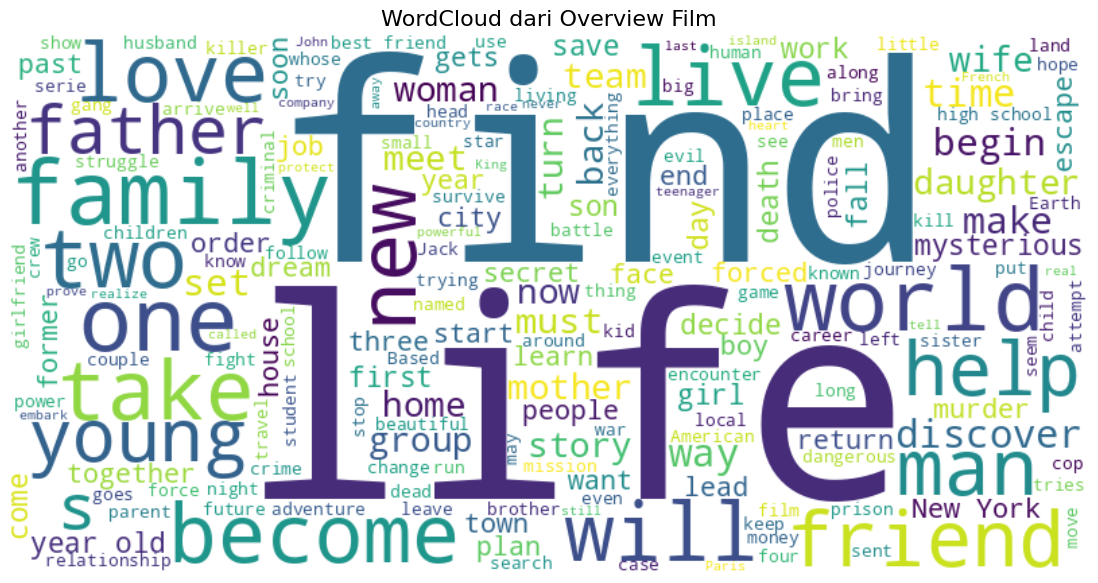

In [9]:
# Gabungkan semua overview
text = ' '.join(df['overview'].dropna().tolist())

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=STOPWORDS).generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Overview Film', fontsize=16)
plt.show()

# Data Pre-Processing

In [10]:
df['overview'] = df['overview'].fillna('')
df['genre'] = df['genre'].fillna('')
print("\nJumlah Nilai Kosong Setelah Pengisian:")
print(df.isnull().sum())


Jumlah Nilai Kosong Setelah Pengisian:
id                   0
title                0
genre                0
original_language    0
overview             0
popularity           0
release_date         0
vote_average         0
vote_count           0
dtype: int64




> Mengisi nilai kosong dengan string kosong lebih baik daripada menghapus baris karena memungkinkan semua 10.000 film tetap ada dalam sistem rekomendasi tanpa kehilangan film yang mungkin relevan.



In [11]:
# menggabungkan genre dan overview
df['combined_features'] = df['genre'] + ' ' + df['overview']

# menampilkan 5 baris pertama dari kolom baru
display(df[['title', 'combined_features']].head())

,title,combined_features
0,The Shawshank Redemption,"Drama,Crime Framed in the 1940s for the double..."
1,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance Raj is a rich, carefree, ..."
2,The Godfather,"Drama,Crime Spanning the years 1945 to 1955, a..."
3,Schindler's List,"Drama,History,War The true story of how busine..."
4,The Godfather: Part II,"Drama,Crime In the continuing saga of the Corl..."




> Kolom genre dan overview digabung agar sistem rekomendasi bisa lebih akurat mengenali kemiripan film berdasarkan tema dan deskripsi ceritanya.



# Feature Extraction

In [12]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['combined_features'])
print("\nUkuran Matriks TF-IDF:", tfidf_matrix.shape)


Ukuran Matriks TF-IDF: (10000, 27965)




> TF-IDF mengubah teks menjadi angka agar sistem rekomendasi bisa mengukur kemiripan antar film berdasarkan kata-kata penting.



In [13]:
# Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
print("\nUkuran Matriks Cosine Similarity:", cosine_sim.shape)
print("\nContoh Skor Kemiripan untuk Film Pertama:")
print(cosine_sim[0][:5])


Ukuran Matriks Cosine Similarity: (10000, 10000)

Contoh Skor Kemiripan untuk Film Pertama:
[1.         0.00978111 0.02126145 0.00269654 0.01663191]


In [14]:
# Ubah cosine similarity ke DataFrame
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=df['title'],   # baris: judul film
    columns=df['title']  # kolom: judul film
)

# Tampilkan 5 baris pertama sebagai sampel
print("\nContoh DataFrame Cosine Similarity:")
cosine_sim_df.iloc[:5, :5]


Contoh DataFrame Cosine Similarity:


title,The Shawshank Redemption,Dilwale Dulhania Le Jayenge,The Godfather,Schindler's List,The Godfather: Part II
title,,,,,
The Shawshank Redemption,1.000000,0.009781,0.021261,0.002697,0.016632
Dilwale Dulhania Le Jayenge,0.009781,1.000000,0.008774,0.002347,0.038124
The Godfather,0.021261,0.008774,1.000000,0.003062,0.429647
Schindler's List,0.002697,0.002347,0.003062,1.000000,0.002969
The Godfather: Part II,0.016632,0.038124,0.429647,0.002969,1.000000




> Pada tahap cosine similarity, kemiripan antar film dihitung dengan mengukur sudut antara vektor TF-IDF masing-masing film, menghasilkan matriks 10.000 x 10.000 yang menunjukkan seberapa mirip setiap pasangan film berdasarkan konten teksnya.



# Fungsi Rekomendasi

In [15]:
def get_recommendations(title, cosine_sim=cosine_sim):
    # Mengecek apakah judul film yang diminta ada di dataset
    if title not in df['title'].values:
        return f"Film {title} tidak ditemukan di dataset."

    # Mengambil index dari film yang sesuai dengan judul
    idx = df[df['title'] == title].index[0]

    # Mengambil skor kemiripan (cosine similarity) antara film tersebut dengan semua film lain
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Mengurutkan daftar skor kemiripan dari yang paling tinggi ke paling rendah
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Mengambil 10 film teratas dengan kemiripan tertinggi, kecuali film itu sendiri (urutan pertama)
    sim_scores = sim_scores[1:11]

    # Mengambil index dari 10 film yang paling mirip
    movie_indices = [i[0] for i in sim_scores]

    # Mengambil nilai skor kemiripan dari 10 film tersebut
    similarity_scores = [i[1] for i in sim_scores]

    # Mengambil informasi judul, genre, dan rating dari film-film rekomendasi
    result = df[['title', 'genre', 'vote_average']].iloc[movie_indices].copy()

    # Menambahkan kolom skor kemiripan ke DataFrame hasil rekomendasi
    result['similarity_score'] = similarity_scores

    # Mengembalikan DataFrame berisi 10 film rekomendasi beserta skor kemiripannya
    return result




> Fungsi get_recommendations menerima judul film, memeriksa keberadaannya di dataset, lalu mengembalikan 10 film paling mirip berdasarkan skor cosine similarity dari matriks TF-IDF, dengan menampilkan judul, genre, dan rating rata-rata.



In [16]:
# menguji rekomendasi
test_titles = ['Midsommar', 'RoboCop', 'The Dead Pool']
for title in test_titles:
    print(f"\nRekomendasi untuk '{title}':")
    display(get_recommendations(title))


Rekomendasi untuk 'Midsommar':


,title,genre,vote_average,similarity_score
6110,The Experiment,"Thriller,Drama",6.4,0.140349
8486,He's Out There,"Horror,Thriller",5.8,0.134374
7880,No One Gets Out Alive,"Horror,Thriller,Mystery",6.0,0.128938
8496,A Christmas Horror Story,"Horror,Fantasy",5.8,0.119459
5961,Aftermath,"Horror,Crime,Drama,Thriller",6.4,0.119332
6798,The Crazies,"Mystery,Horror,Action",6.2,0.117672
7398,Don't Hang Up,"Horror,Thriller",6.1,0.116842
2104,Munna Bhai M.B.B.S.,"Comedy,Drama",7.3,0.116446
7268,The Children,"Horror,Mystery,Thriller",6.1,0.115768
6511,The Visit,"Horror,Thriller,Mystery",6.3,0.113543



Rekomendasi untuk 'RoboCop':


,title,genre,vote_average,similarity_score
9967,RoboCop 3,"Action,Adventure,Crime,Science Fiction,Thriller",4.7,0.292440
8403,RoboCop,"Science Fiction,Action",5.8,0.177102
7999,RoboCop 2,"Action,Adventure,Crime,Science Fiction,Thriller",5.9,0.133381
9194,Coffee & Kareem,"Comedy,Action,Crime",5.5,0.127443
7783,Cobra,"Action,Crime,Thriller",6.0,0.126506
7290,Resident Evil: Welcome to Raccoon City,"Horror,Action,Science Fiction",6.1,0.108792
9615,How It Ends,"Science Fiction,Thriller,Mystery,Action,Adventure",5.3,0.107706
5484,Monsters of Man,Science Fiction,6.5,0.106853
9605,Home Alone 3,"Comedy,Family",5.3,0.106329
3212,Strange Days,"Crime,Drama,Science Fiction,Thriller",7.0,0.106303



Rekomendasi untuk 'The Dead Pool':


,title,genre,vote_average,similarity_score
4123,The Enforcer,"Action,Crime,Thriller",6.8,0.304391
2646,Magnum Force,"Drama,Crime,Action",7.2,0.301714
5275,Sudden Impact,"Crime,Action,Thriller",6.6,0.229608
9158,Dumb and Dumber To,Comedy,5.5,0.209485
432,Harry Potter and the Philosopher's Stone,"Adventure,Fantasy",7.9,0.188225
584,Harry Potter and the Goblet of Fire,"Adventure,Fantasy,Family",7.8,0.167503
1300,Dirty Harry,"Action,Crime,Thriller",7.5,0.156369
332,The Third Man,"Thriller,Mystery",8.0,0.151186
2001,The Eighth Day,Drama,7.3,0.150743
7166,Dante's Peak,"Action,Adventure,Drama,Thriller",6.1,0.150310


# Evaluasi

In [19]:
df[df.title == 'Midsommar']

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count,combined_features
2680,530385,Midsommar,"Horror,Drama,Mystery",en,Several friends travel to Sweden to study as a...,61.223,2019-07-03,7.1,4950,"Horror,Drama,Mystery Several friends travel to..."


In [20]:
get_recommendations('Midsommar')

,title,genre,vote_average,similarity_score
6110,The Experiment,"Thriller,Drama",6.4,0.140349
8486,He's Out There,"Horror,Thriller",5.8,0.134374
7880,No One Gets Out Alive,"Horror,Thriller,Mystery",6.0,0.128938
8496,A Christmas Horror Story,"Horror,Fantasy",5.8,0.119459
5961,Aftermath,"Horror,Crime,Drama,Thriller",6.4,0.119332
6798,The Crazies,"Mystery,Horror,Action",6.2,0.117672
7398,Don't Hang Up,"Horror,Thriller",6.1,0.116842
2104,Munna Bhai M.B.B.S.,"Comedy,Drama",7.3,0.116446
7268,The Children,"Horror,Mystery,Thriller",6.1,0.115768
6511,The Visit,"Horror,Thriller,Mystery",6.3,0.113543


**Analisis:**

Genre Midsommar: Horror, Drama, Mystery

Rekomendasi (10 film):

*   The Experiment: Thriller, Drama (mengandung Drama)
*   He's Out There: Horror, Thriller (mengandung Horror)
*   No One Gets Out Alive: Horror, Thriller, Mystery (mengandung Horror, Mystery)
*   A Christmas Horror Story: Horror, Fantasy (mengandung Horror)
*   Aftermath: Horror, Crime, Drama, Thriller (mengandung Horror, Drama)
*   The Crazies: Mystery, Horror, Action (mengandung Horror, Mystery)
*   Don't Hang Up: Horror, Thriller (mengandung Horror)
*   Munna Bhai M.B.B.S.: Comedy, Drama (mengandung Drama)
*   The Children: Horror, Mystery, Thriller (mengandung Horror, Mystery)
*   The Visit: Horror, Thriller, Mystery (mengandung Horror, Mystery)

Semua 10 film yang direkomendasikan memiliki setidaknya satu genre (Horror, Drama, atau Mystery) yang cocok dengan Midsommar. Jadi, semua rekomendasi dianggap relevan.

Perhitungan Presisi:
$$\text{Presisi} = \frac{\text{Jumlah rekomendasi yang relevan}}{\text{Total rekomendasi}} = \frac{10}{10} = 1.0$$

Hasil Akhir:

Presisi dari model rekomendasi adalah 1.0 atau 100%. Artinya, semua film yang direkomendasikan relevan dengan genre Midsommar.